<a href="https://colab.research.google.com/github/vinayakmon/solarprediction/blob/main/Yet_another_copy_of_linear_regression_SOLAR_predicn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs


In [ ]:
from google.colab import files
files.upload()

Saving solarr.csv to solarr.csv


{'solarr.csv': b'-BEGIN HEADER-,,,,,,,,,,,,,,\r\nNASA/POWER Source Native Resolution Monthly and Annual ,,,,,,,,,,,,,,\r\nDates (month/day/year): 01/01/2009 through 12/31/2024 in LST,,,,,,,,,,,,,,\r\nLocation: Latitude  10.1632   Longitude 76.6413 ,,,,,,,,,,,,,,\r\nElevation from MERRA-2: Average for 0.5 x 0.625 degree lat/lon region = 711.18 meters,,,,,,,,,,,,,,\r\nThe value for missing source data that cannot be computed or is outside of the sources availability range: -999 ,,,,,,,,,,,,,,\r\nParameter(s): ,,,,,,,,,,,,,,\r\nALLSKY_SFC_SW_DWN     CERES SYN1deg All Sky Surface Shortwave Downward Irradiance (kW-hr/m^2/day) ,,,,,,,,,,,,,,\r\n-END HEADER-,,,,,,,,,,,,,,\r\nPARAMETER,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANN\r\nALLSKY_SFC_SW_DWN,2009,5.7034,6.3269,6.0869,5.6707,5.3069,4.6054,3.7982,4.7146,4.6447,5.2452,4.5324,4.6906,5.1031\r\nALLSKY_SFC_SW_DWN,2010,5.3779,6.0739,6.3434,5.929,5.2409,4.3978,3.9677,4.0882,4.7743,4.3939,4.0678,4.5739,4.9279\r\nALLSKY_SFC_SW_DWN,20

In [ ]:
import pandas as pd

solar_dataset = pd.read_csv("solarr.csv", skiprows=9)
solar_dataset

,PARAMETER,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANN
0,ALLSKY_SFC_SW_DWN,2009,5.7034,6.3269,6.0869,5.6707,5.3069,4.6054,3.7982,4.7146,4.6447,5.2452,4.5324,4.6906,5.1031
1,ALLSKY_SFC_SW_DWN,2010,5.3779,6.0739,6.3434,5.9290,5.2409,4.3978,3.9677,4.0882,4.7743,4.3939,4.0678,4.5739,4.9279
2,ALLSKY_SFC_SW_DWN,2011,5.4708,5.8778,6.5482,5.6959,5.7382,4.0445,3.8414,4.0800,4.8348,5.2186,4.7774,4.8142,5.0746
3,ALLSKY_SFC_SW_DWN,2012,5.6494,6.0994,5.9580,5.7504,5.2325,4.3656,4.5473,4.1335,5.0935,5.0810,5.1814,4.9205,5.1634
4,ALLSKY_SFC_SW_DWN,2013,5.6414,5.9273,5.9916,5.9638,5.0534,3.5419,3.4337,4.5386,4.7503,4.9397,4.8466,5.0033,4.9634
5,ALLSKY_SFC_SW_DWN,2014,5.4686,5.7919,6.3886,5.7487,5.3052,4.6459,4.0594,4.1635,5.2286,4.5854,4.5144,4.4530,5.0232
6,ALLSKY_SFC_SW_DWN,2015,5.4305,6.1361,6.1001,5.7158,4.9394,4.3970,4.6294,4.9963,5.4096,4.9034,4.3018,4.6817,5.1305
7,ALLSKY_SFC_SW_DWN,2016,5.2798,5.7806,6.2071,6.0067,5.2870,3.8338,4.3025,4.8005,5.0338,4.8946,4.8924,4.7604,5.0878
8,ALLSKY_SFC_SW_DWN,2017,5.2018,6.3802,6.0382,6.1466,5.3357,4.1705,4.5962,4.3210,4.9034,4.7460,4.5766,4.9848,5.1082
9,ALLSKY_SFC_SW_DWN,2018,5.2663,6.3014,6.1378,6.0396,5.0993,3.9079,3.8551,4.0109,5.9779,5.0042,4.7275,4.6337,5.0693


In [ ]:
solar_dataset['PARAMETER'].unique()

array(['ALLSKY_SFC_SW_DWN'], dtype=object)

In [ ]:
solar_dataset.shape

(16, 15)

In [ ]:
solar_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PARAMETER  16 non-null     object 
 1   YEAR       16 non-null     int64  
 2   JAN        16 non-null     float64
 3   FEB        16 non-null     float64
 4   MAR        16 non-null     float64
 5   APR        16 non-null     float64
 6   MAY        16 non-null     float64
 7   JUN        16 non-null     float64
 8   JUL        16 non-null     float64
 9   AUG        16 non-null     float64
 10  SEP        16 non-null     float64
 11  OCT        16 non-null     float64
 12  NOV        16 non-null     float64
 13  DEC        16 non-null     float64
 14  ANN        16 non-null     float64
dtypes: float64(13), int64(1), object(1)
memory usage: 2.0+ KB


In [ ]:
#checking for missing values
solar_dataset.isnull().sum()

,0
PARAMETER,0
YEAR,0
JAN,0
FEB,0
MAR,0
APR,0
MAY,0
JUN,0
JUL,0
AUG,0


In [ ]:
solar_dataset.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANN
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,2016.500000,5.400694,6.077562,6.252262,5.928806,5.184831,4.369288,4.096994,4.462612,4.932562,4.810244,4.582606,4.689706,5.059275
std,4.760952,0.246398,0.196097,0.213145,0.269001,0.382808,0.400491,0.355862,0.475833,0.450814,0.303713,0.356929,0.209867,0.093963
min,2009.000000,4.738100,5.780600,5.958000,5.462600,4.283500,3.541900,3.433700,3.734900,4.052400,4.052200,3.729600,4.415300,4.907800
25%,2012.750000,5.276425,5.914925,6.074725,5.710825,5.024900,4.139000,3.851675,4.122175,4.654875,4.702375,4.461250,4.502250,4.992800
50%,2016.500000,5.437950,6.087750,6.235050,5.946400,5.263950,4.397400,4.044400,4.433300,4.869100,4.856200,4.594350,4.682300,5.081200
75%,2020.250000,5.545475,6.251150,6.419550,6.129725,5.360175,4.646200,4.373075,4.653925,5.201075,4.983875,4.835800,4.840775,5.113925
max,2024.000000,5.703400,6.380200,6.558700,6.328600,5.738200,4.939400,4.629400,5.743900,5.977900,5.245200,5.181400,5.012600,5.209000


/tmp/ipython-input-1892056949.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(solar_dataset['YEAR'])


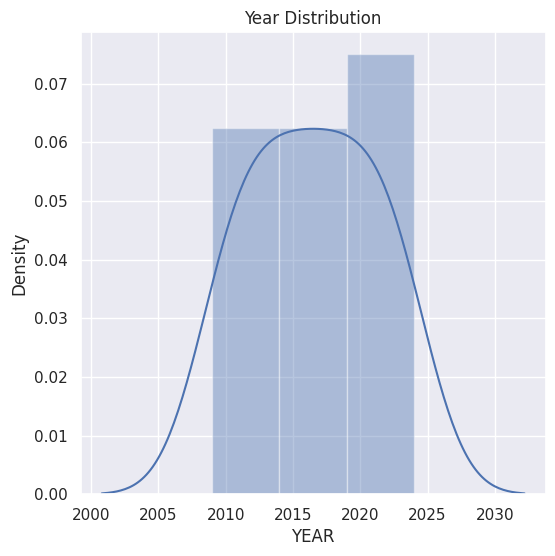

In [ ]:
#distribution of year
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(solar_dataset['YEAR'])
plt.title('Year Distribution')
plt.show()

/tmp/ipython-input-1787145260.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(solar_dataset['JAN'])


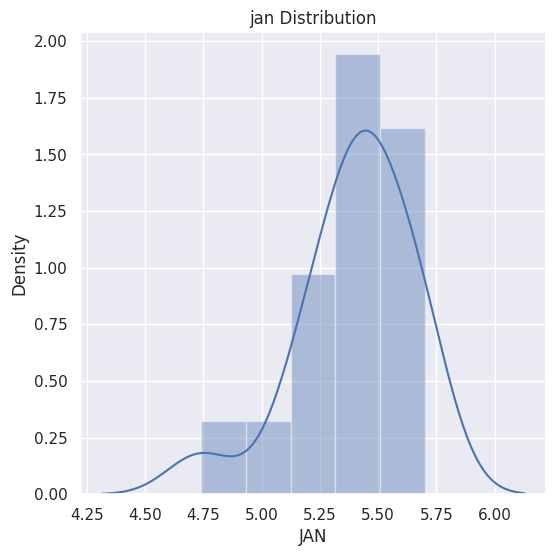

In [ ]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(solar_dataset['JAN'])
plt.title('jan Distribution')
plt.show()

/tmp/ipython-input-3176677093.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(solar_dataset['MAR'])


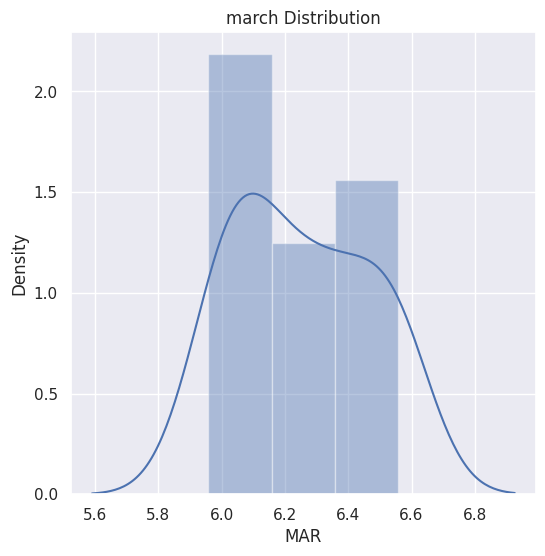

In [ ]:
#FEB distribution
plt.figure(figsize=(6,6))
sns.distplot(solar_dataset['MAR'])
plt.title('march Distribution')
plt.show()

/tmp/ipython-input-295639962.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(solar_dataset['APR'])


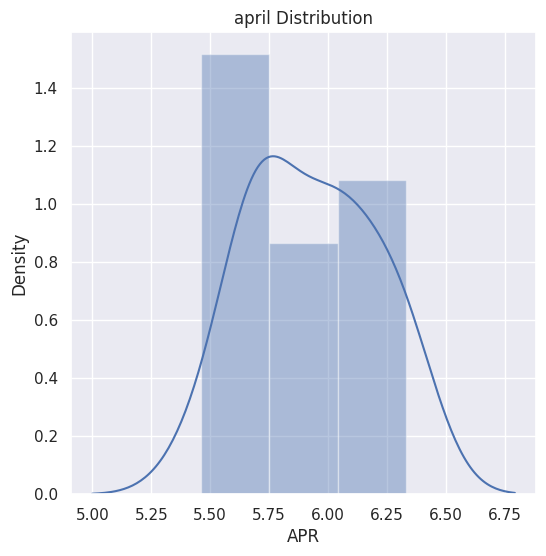

In [ ]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(solar_dataset['APR'])
plt.title('april Distribution')
plt.show()

/tmp/ipython-input-3706912267.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(solar_dataset['MAY'])


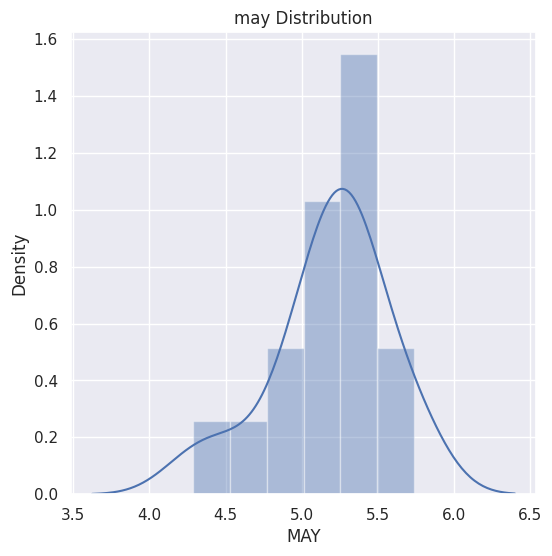

In [ ]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(solar_dataset['MAY'])
plt.title('may Distribution')
plt.show()

/tmp/ipython-input-3234681837.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(solar_dataset['JUN'])


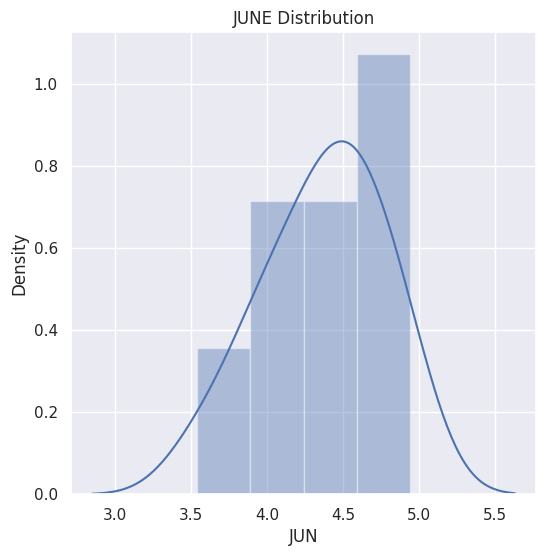

In [ ]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(solar_dataset['JUN'])
plt.title('JUNE Distribution')
plt.show()

/tmp/ipython-input-2860288116.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(solar_dataset['JUL'])


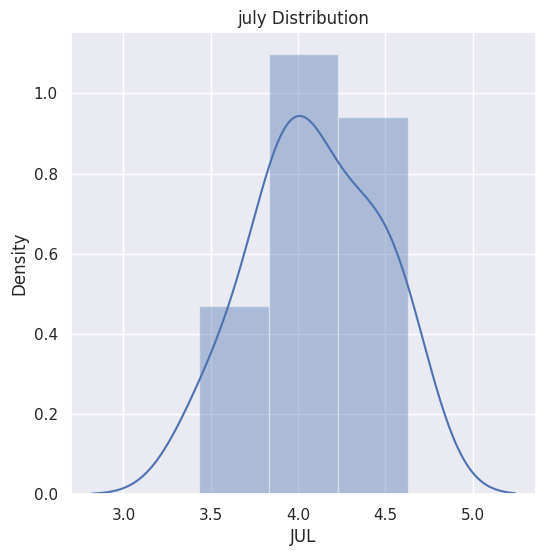

In [ ]:
#distribution of JULY
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(solar_dataset['JUL'])
plt.title('july Distribution')
plt.show()

/tmp/ipython-input-273320014.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(solar_dataset['AUG'])


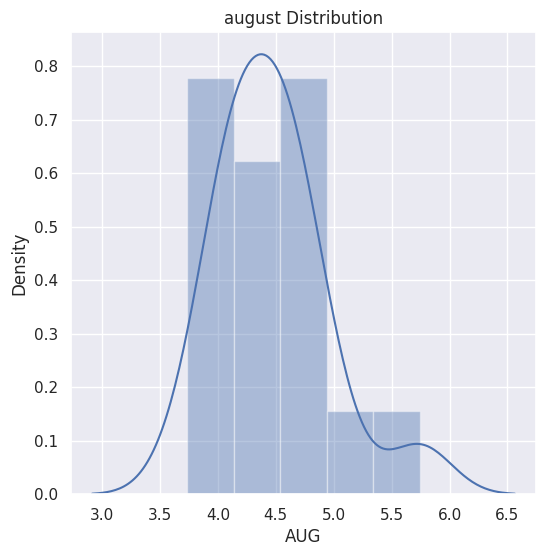

In [ ]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(solar_dataset['AUG'])
plt.title('august Distribution')
plt.show()

/tmp/ipython-input-4156232948.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(solar_dataset['SEP'])


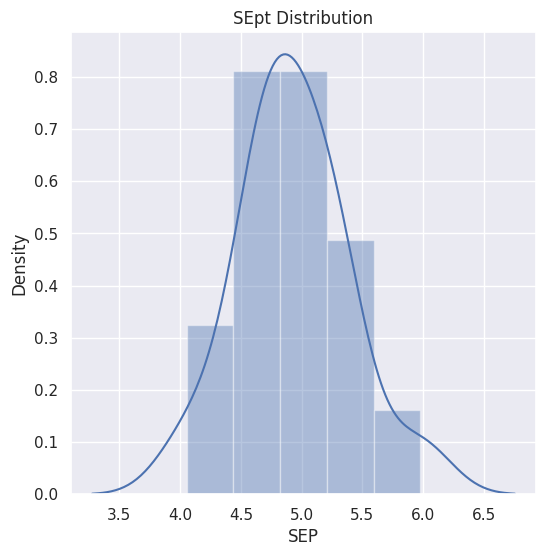

In [ ]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(solar_dataset['SEP'])
plt.title('SEpt Distribution')
plt.show()

/tmp/ipython-input-2145148406.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(solar_dataset['OCT'])


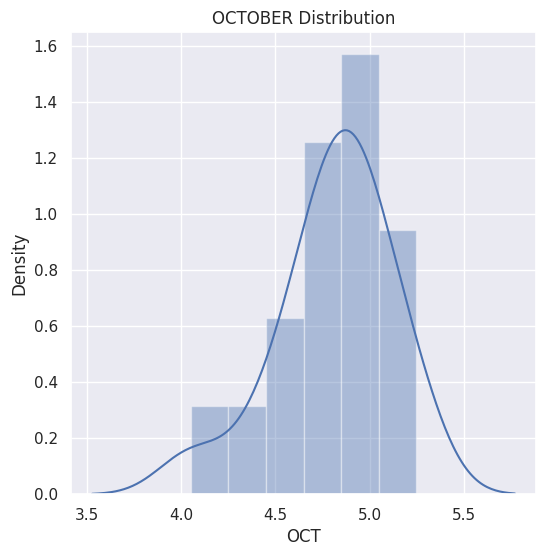

In [ ]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(solar_dataset['OCT'])
plt.title('OCTOBER Distribution')
plt.show()

/tmp/ipython-input-3163191379.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(solar_dataset['NOV'])


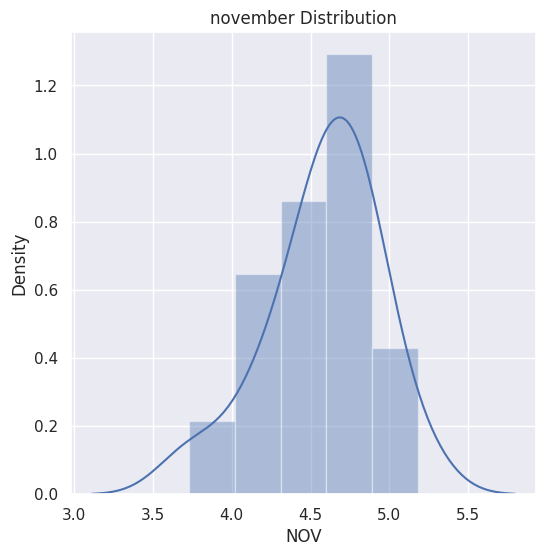

In [ ]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(solar_dataset['NOV'])
plt.title('november Distribution')
plt.show()

/tmp/ipython-input-2322823467.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(solar_dataset['DEC'])


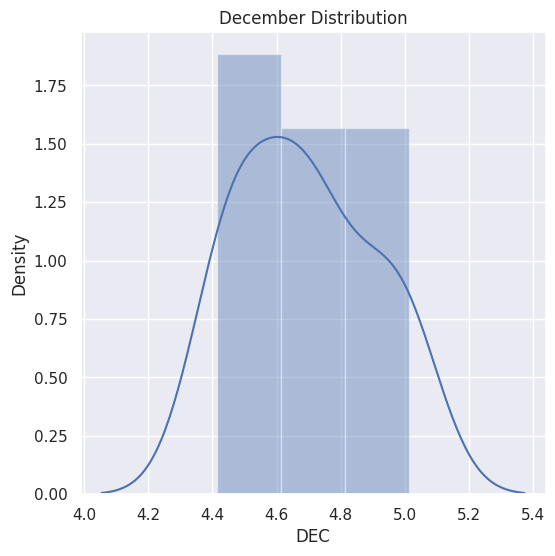

In [ ]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(solar_dataset['DEC'])
plt.title('December Distribution')
plt.show()

/tmp/ipython-input-999548011.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(solar_dataset['ANN'])


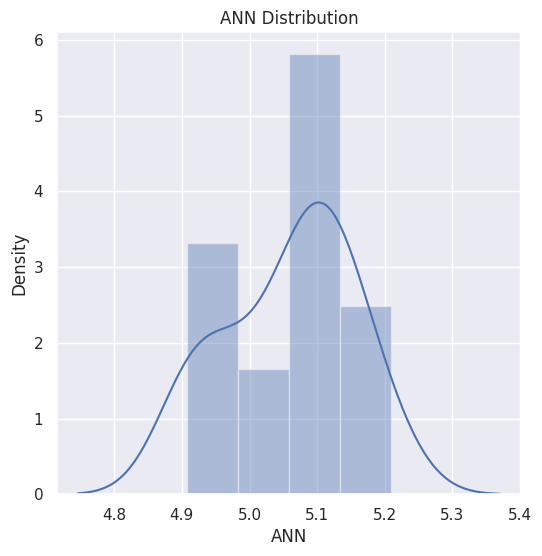

In [ ]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(solar_dataset['ANN'])
plt.title('ANN Distribution')
plt.show()

In [ ]:
X=solar_dataset.drop(columns=['ANN','PARAMETER'],axis=1)
Y=solar_dataset['ANN']

In [ ]:
print(X)

    YEAR     JAN     FEB     MAR     APR     MAY     JUN     JUL     AUG  \
0   2009  5.7034  6.3269  6.0869  5.6707  5.3069  4.6054  3.7982  4.7146   
1   2010  5.3779  6.0739  6.3434  5.9290  5.2409  4.3978  3.9677  4.0882   
2   2011  5.4708  5.8778  6.5482  5.6959  5.7382  4.0445  3.8414  4.0800   
3   2012  5.6494  6.0994  5.9580  5.7504  5.2325  4.3656  4.5473  4.1335   
4   2013  5.6414  5.9273  5.9916  5.9638  5.0534  3.5419  3.4337  4.5386   
5   2014  5.4686  5.7919  6.3886  5.7487  5.3052  4.6459  4.0594  4.1635   
6   2015  5.4305  6.1361  6.1001  5.7158  4.9394  4.3970  4.6294  4.9963   
7   2016  5.2798  5.7806  6.2071  6.0067  5.2870  3.8338  4.3025  4.8005   
8   2017  5.2018  6.3802  6.0382  6.1466  5.3357  4.1705  4.5962  4.3210   
9   2018  5.2663  6.3014  6.1378  6.0396  5.0993  3.9079  3.8551  4.0109   
10  2019  5.5135  5.9942  6.5410  6.2981  5.7367  4.7810  4.4033  3.7349   
11  2020  5.6930  6.0761  6.2630  6.1241  5.4336  4.5077  4.3630  4.5756   
12  2021  4.

In [ ]:
print(Y)

0     5.1031
1     4.9279
2     5.0746
3     5.1634
4     4.9634
5     5.0232
6     5.1305
7     5.0878
8     5.1082
9     5.0693
10    5.1593
11    5.1084
12    4.9099
13    4.9078
14    5.2090
15    5.0026
Name: ANN, dtype: float64


Splitting the data training data testing data



In [ ]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(16, 13) (12, 13) (4, 13)


In [ ]:
print(X_train)

    YEAR     JAN     FEB     MAR     APR     MAY     JUN     JUL     AUG  \
9   2018  5.2663  6.3014  6.1378  6.0396  5.0993  3.9079  3.8551  4.0109   
3   2012  5.6494  6.0994  5.9580  5.7504  5.2325  4.3656  4.5473  4.1335   
1   2010  5.3779  6.0739  6.3434  5.9290  5.2409  4.3978  3.9677  4.0882   
10  2019  5.5135  5.9942  6.5410  6.2981  5.7367  4.7810  4.4033  3.7349   
7   2016  5.2798  5.7806  6.2071  6.0067  5.2870  3.8338  4.3025  4.8005   
14  2023  5.4454  6.2455  6.3317  6.3286  5.4871  4.6471  4.0133  5.7439   
2   2011  5.4708  5.8778  6.5482  5.6959  5.7382  4.0445  3.8414  4.0800   
11  2020  5.6930  6.0761  6.2630  6.1241  5.4336  4.5077  4.3630  4.5756   
6   2015  5.4305  6.1361  6.1001  5.7158  4.9394  4.3970  4.6294  4.9963   
15  2024  5.1235  6.2681  6.5124  6.3283  4.5502  4.1887  3.5746  4.6337   
13  2022  5.4077  5.8282  6.0295  5.4626  4.2835  4.9394  4.0294  4.3858   
8   2017  5.2018  6.3802  6.0382  6.1466  5.3357  4.1705  4.5962  4.3210   

       SEP 

In [ ]:
print(Y_train)

9     5.0693
3     5.1634
1     4.9279
10    5.1593
7     5.0878
14    5.2090
2     5.0746
11    5.1084
6     5.1305
15    5.0026
13    4.9078
8     5.1082
Name: ANN, dtype: float64


Model Training

In [ ]:
regressor=LinearRegression()
regressor.fit(X_train,Y_train) #training the algorithm

LinearRegression()

Model Evaluation

In [ ]:
#prediction on  training data
training_data_prediction=regressor.predict(X_train)

In [ ]:
#R squared value
r2_train=metrics.r2_score(Y_train,training_data_prediction)
print('R squared value:',r2_train)

R squared value: 1.0


In [ ]:
#prediction on  testing data
test_data_prediction=regressor.predict(X_test)

In [ ]:
#R squared value
r2_test=metrics.r2_score(Y_test,test_data_prediction)
print('R squared value:',r2_test)

R squared value: 0.9732024540612033


In [ ]:
input_data  = (2024, 5.12, 6.26, 6.51, 6.32, 4.55, 4.18, 3.57, 4.63, 5.33, 4.59, 4.56, 4.45)

# changing the input data into to a numpy array
input_data_as_numpy_array = np.array(input_data)
# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = regressor.predict(input_data_reshaped)
print(prediction[0])
print('value of y is ',prediction[0])

4.99826229987182
value of y is  4.99826229987182


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
